In [7]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
colors = ["aqua", "dark blue"]
sns.set_palette(sns.color_palette("Set1", 9)+sns.xkcd_palette(colors))

In [3]:
def maxes(weights):
#     print(np.shape(weights))
    ret = np.array([])
    for idx in range(3,len(weights)-3):
        val = weights[idx]
#         print(idx)
        if (val > np.max(weights[idx+1:idx+3])) and (val > np.max(weights[idx-3:idx])):
            ret = np.append(ret, idx)
#             print(idx, val)
#             print("    ", np.max(weights[idx+1:idx+3]))
#             print(weights[idx:idx+3])
#             print()
    return ret

# Looking at local maxima

In [67]:
L = 9

H = hm.sparse_H(L)
vals, vecs = la.eigh(H)
eners = np.diag(vals)
vecsd = vecs.T.conj()

# Total time elapsed
end = 6
# Time steps per second
n = 20
N = n*end
A = hm.Z
for i in range(L-1):
    A = np.kron(A,hm.I)
B = hm.Z
for i in range(L-1):
    B = np.kron(hm.I,B)

weightfore9 = np.empty((L, N))
weightback9 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = vecs@np.diag(np.exp(-1j*vals*t))@vecsd
    At = np.linalg.inv(unitt) @ A @ unitt
    Bt = np.linalg.inv(unitt) @ B @ unitt
#     print(chop(unit3t),"\n")
    front = hm.norm(At)
    back  = hm.norm(Bt)
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore9[L-1-j, i] = front - fronthere
        weightback9[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

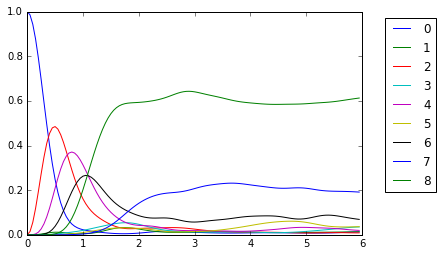

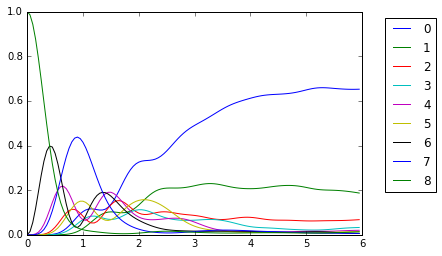

In [70]:
end = 120

for i in range(L):
    plt.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

for i in range(L):
    plt.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [62]:
for i in range(L):
    idx = maxes(weightfore9[i])
    print(idx/n)
print()
for i in range(L):
    idx = maxes(weightback9[L-i-1])
    print(idx/n)

[ 2.5   4.35]
[ 0.5   1.75  3.45]
[ 0.5   2.6   5.55]
[ 1.75  3.75]
[ 0.8   4.95]
[ 1.75  4.7 ]
[ 1.05  2.45  4.3   5.4 ]
[ 3.65  4.85]
[ 2.9]

[ 2.5   4.35]
[ 0.9   3.55]
[ 0.4   1.35  3.65  5.2 ]
[ 0.95  2.1   4.5 ]
[ 0.65  1.5   2.65  4.15  5.15]
[ 1.2   2.05  3.3 ]
[ 0.8   1.65  2.45  3.95]
[ 1.5   2.55  3.3   4.7 ]
[ 1.15  5.3 ]


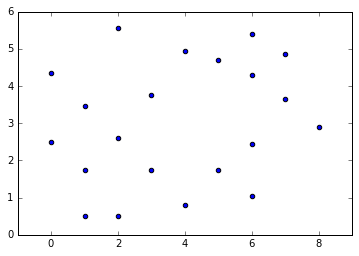

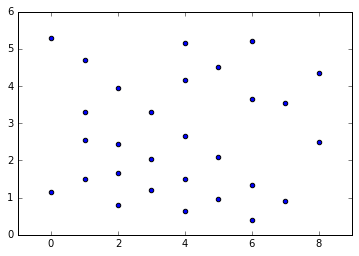

In [63]:
for i in range(L):
    for j, val in enumerate(maxes(weightfore9[i])):
        plt.scatter(i, val/n)
plt.show()

for i in range(L):
    for j, val in enumerate(maxes(weightback9[i])):
        plt.scatter(i, val/n)
plt.show()

# Looking at initial behavior
### Extended Strings

In [4]:
L = 9

H = hm.sparse_H(L)
vals, vecs = la.eigh(H)
eners = np.diag(vals)
vecsd = vecs.T.conj()

# Total time elapsed
end = 1
# Time steps per second
ninit = 60
Ninit = ninit*end
A = hm.Z
for i in range(L-1):
    A = np.kron(A,hm.I)
B = hm.Z
for i in range(L-1):
    B = np.kron(hm.I,B)

weightforeinit = np.empty((L, Ninit))
weightbackinit = np.empty((L, Ninit))

for i in np.arange(Ninit):
    t = i/ninit
    unitt = vecs@np.diag(np.exp(-1j*vals*t))@vecsd
    At = np.linalg.inv(unitt) @ A @ unitt
    Bt = np.linalg.inv(unitt) @ B @ unitt
#     print(chop(unit3t),"\n")
    front = hm.norm(At)
    back  = hm.norm(Bt)
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightforeinit[L-1-j, i] = front - fronthere
        weightbackinit[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

0 [-0.29954688 -0.77896737]
1 [ 3.39184125 -0.98348928]
2 [ 1.76055096  1.1423061 ]
3 [ 5.53090314 -1.01449217]
4 [ 3.79845592  1.62127798]
5 [ 7.61742289 -1.77096858]
6 [ 5.82564303  1.26138143]
7 [ 9.68838538 -3.02413146]
8 [ 7.86679054  0.36207589]


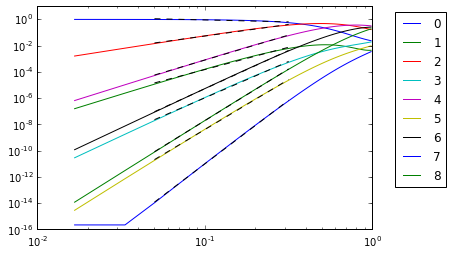

0 [ 7.85832978  0.34128068]
1 [ 10.04500131  -1.93164636]
2 [ 5.81320896  1.23083773]
3 [ 8.04068739 -0.47270318]
4 [ 3.77945622  1.57462868]
5 [ 6.06006136  0.60856418]
6 [ 1.73102837  1.06992011]
7 [ 4.12735136  1.25419612]
8 [-0.29954688 -0.77896737]


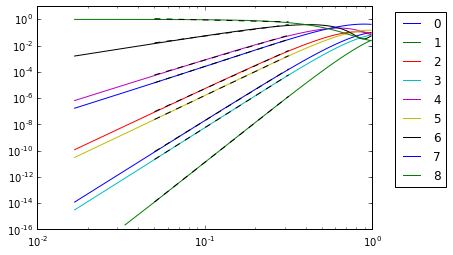

In [8]:
for i in range(L):
    plt.loglog(np.arange(Ninit)/ninit,weightforeinit[i], label = str(i))
    x = np.arange(Ninit)[3:20]/ninit
    y = weightforeinit[i][3:20]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    plt.loglog(x,yfit(x), 'k--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

for i in range(L):
    plt.loglog(np.arange(Ninit)/ninit,weightbackinit[i], label = str(i))
    x = np.arange(Ninit)[3:20]/ninit
    y = weightbackinit[i][3:20]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    plt.loglog(x,yfit(x), 'k--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# GOOD SHIT

0 [-0.22806104 -0.64537868]
1 [ 3.506984  -0.7706456]
2 [ 1.81723584  1.24814523]
3 [ 5.61941276 -0.85107562]
4 [ 3.84629108  1.71062193]
5 [ 7.69020229 -1.63644758]
6 [ 5.8674097   1.33960991]
7 [ 9.7051822  -2.99655938]
8 [ 7.8830393   0.37761653]
9 [ 11.6271597   -4.90046795]
10 [ 9.88377179 -1.04727877]


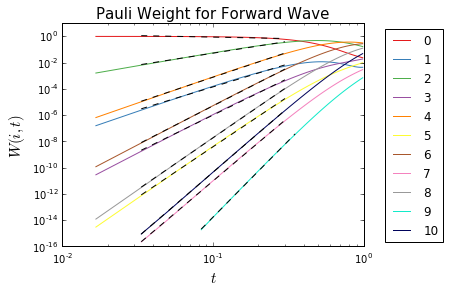

0 [ 9.9088299  -1.00930783]
1 [ 12.00638086  -3.83892069]
2 [ 7.87707656  0.36158689]
3 [ 10.17593682  -1.72255575]
4 [ 5.85872894  1.31627132]
5 [ 8.05004908 -0.45346985]
6 [ 3.83304312  1.67501865]
7 [ 6.06924933  0.6277478 ]
8 [ 1.79673821  1.19312054]
9 [ 4.12769107  1.25737669]
10 [-0.22806104 -0.64537868]


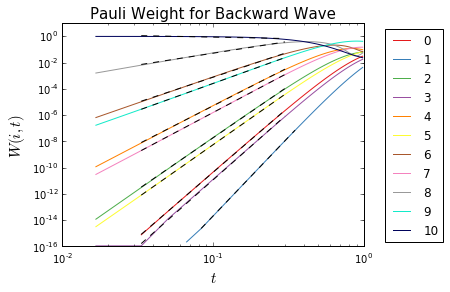

In [52]:
[front, back] = np.load("data/L11end1n60.npy")
L = 11
end = 1
ninit = 60
Ninit = ninit*end

ax = plt.subplot(111)
for i in range(L):
    ax.loglog(np.arange(Ninit)/ninit,front[i], label = str(i))
    x = np.arange(Ninit)[2:19]/ninit
    y = front[i][2:19]
    if (i == 9): 
        x = np.arange(Ninit)[5:22]/ninit
        y = front[i][5:22]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    ax.loglog(x,yfit(x), 'k--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Pauli Weight for Forward Wave', fontsize=15)
plt.ylabel("$W(i,t)$", fontsize=15)
plt.xlabel("$t$", fontsize=15)
# plt.savefig('figures/L11end1n60fore.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    plt.loglog(np.arange(Ninit)/ninit,back[i], label = str(i))
    x = np.arange(Ninit)[2:19]/ninit
    y = back[i][2:19]
    if (i == 1): 
        x = np.arange(Ninit)[5:22]/ninit
        y = back[i][5:22]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    plt.loglog(x,yfit(x), 'k--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Pauli Weight for Backward Wave', fontsize=15)
plt.ylabel("$W(i,t)$", fontsize=15)
plt.xlabel("$t$", fontsize=15)
# plt.savefig('figures/L11end1n60back.pdf')
plt.show()

0 [-0.0110169  -0.02903279]
1 [ 1.85885984  1.36784057]
2 [ 1.87645224  1.41529219]
3 [ 3.86681506  1.76926911]
4 [ 3.87270585  1.78515861]
5 [ 5.87947281  1.37400747]
6 [ 5.88219513  1.38134381]
7 [ 7.8910584   0.40044216]
8 [ 7.89252802  0.40439999]
9 [ 9.80995422 -1.17920962]
10 [ 9.88377179 -1.04727877]


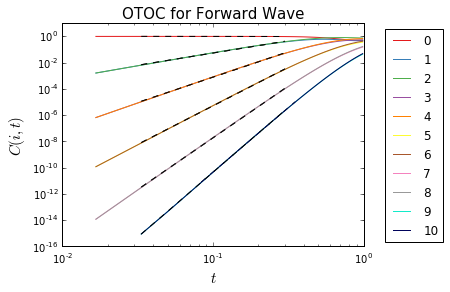

0 [ 9.9088299  -1.00930783]
1 [ 9.80392469 -1.1921265 ]
2 [ 7.88661177  0.38849071]
3 [ 7.88822927  0.3928292 ]
4 [ 5.87363142  1.35830824]
5 [ 5.87665983  1.36644734]
6 [ 3.85982199  1.75049778]
7 [ 3.8665327   1.76853724]
8 [ 1.85741308  1.36404258]
9 [ 1.87784882  1.41896213]
10 [-0.0110169  -0.02903279]


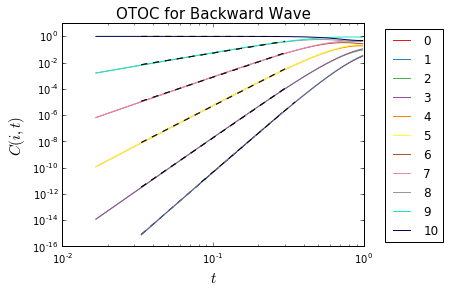

In [53]:
[front, back] = np.load("data/L11end1n60_here.npy")
L = 11
end = 1
ninit = 60
Ninit = ninit*end

ax = plt.subplot(111)
for i in range(L):
    ax.loglog(np.arange(Ninit)/ninit,front[i], label = str(i))
    x = np.arange(Ninit)[2:19]/ninit
    y = front[i][2:19]
    if (i == 9): 
        x = np.arange(Ninit)[5:22]/ninit
        y = front[i][5:22]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    ax.loglog(x,yfit(x), 'k--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('OTOC for Forward Wave', fontsize=15)
plt.ylabel("$C(i,t)$", fontsize=15)
plt.xlabel("$t$", fontsize=15)
plt.savefig('figures/L11end1n60_herefore.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    plt.loglog(np.arange(Ninit)/ninit,back[i], label = str(i))
    x = np.arange(Ninit)[2:19]/ninit
    y = back[i][2:19]
    if (i == 1): 
        x = np.arange(Ninit)[5:22]/ninit
        y = back[i][5:22]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    plt.loglog(x,yfit(x), 'k--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('OTOC for Backward Wave', fontsize=15)
plt.ylabel("$C(i,t)$", fontsize=15)
plt.xlabel("$t$", fontsize=15)
# plt.savefig('figures/L11end1n60_hereback.pdf')
plt.show()

0 [-0.01062282 -0.02801954]
1 [ 1.84148023  1.31764467]
2 [ 1.85771067  1.36136174]
3 [ 3.8678059   2.17833981]
4 [ 3.91822131  1.93807624]
5 [ 5.90207907  2.14000956]
6 [ 5.96721111  1.65723377]
7 [ 7.93377072  1.4542912 ]
8 [ 8.00118623  0.7538139 ]
9 [ 9.90521249  0.17399084]
10 [ 10.03675283  -0.60898719]


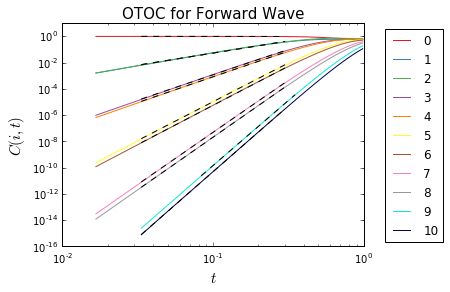

0 [ 9.86078017 -1.22411855]
1 [ 9.7555384  -0.24052869]
2 [ 7.82803752  0.18056957]
3 [ 7.86097017  1.21546225]
4 [ 5.82459334  1.18401652]
5 [ 5.86329382  2.01328225]
6 [ 3.82458333  1.62652205]
7 [ 3.8634408   2.16646512]
8 [ 1.83575688  1.30220791]
9 [ 1.851372   1.3442454]
10 [-0.01062282 -0.02801954]


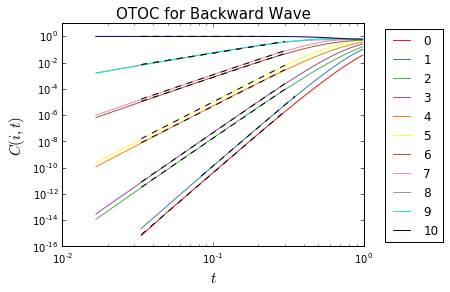

In [54]:
[front, back] = np.load("data/denseL11end1n60_here.npy")
L = 11
end = 1
ninit = 60
Ninit = ninit*end

ax = plt.subplot(111)
for i in range(L):
    ax.loglog(np.arange(Ninit)/ninit,front[i], label = str(i))
    x = np.arange(Ninit)[2:19]/ninit
    y = front[i][2:19]
    if (i == 9): 
        x = np.arange(Ninit)[5:22]/ninit
        y = front[i][5:22]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    ax.loglog(x,yfit(x), 'k--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('OTOC for Forward Wave', fontsize=15)
plt.ylabel("$C(i,t)$", fontsize=15)
plt.xlabel("$t$", fontsize=15)
plt.savefig('figures/denseL11end1n60_herefore.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    plt.loglog(np.arange(Ninit)/ninit,back[i], label = str(i))
    x = np.arange(Ninit)[2:19]/ninit
    y = back[i][2:19]
    if (i == 1): 
        x = np.arange(Ninit)[5:22]/ninit
        y = back[i][5:22]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    plt.loglog(x,yfit(x), 'k--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('OTOC for Backward Wave', fontsize=15)
plt.ylabel("$C(i,t)$", fontsize=15)
plt.xlabel("$t$", fontsize=15)
plt.savefig('figures/denseL11end1n60_hereback.pdf')
plt.show()

### Weight at site

In [ ]:
L = 7

H = hm.dense_H(L)
vals, vecs = la.eigh(H)
vecsd = vecs.T.conj()

# Total time elapsed
end = 3
# Time steps per second
n = 20
N = n*end
A = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    A = np.kron(A,np.array([1,1]))
Alist = hm.arr2list(A)
B = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    B = np.kron(np.array([1,1]),B)
Blist = hm.arr2list(B)


weightfore9 = np.empty((L, N))
weightback9 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = np.matmul(vecs * np.exp(-1j*vals*t), vecsd)
    uninv = np.matmul(vecs * np.exp( 1j*vals*t), vecsd)
    
    ulist = hm.mat2list(unitt)
    uinvlist = hm.mat2list(uninv)
    
    Atlist = []
    for idx, val in enumerate(Alist):
        Atlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    Btlist = []
    for idx, val in enumerate(Blist):
        Btlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    At = hm.list2mat(Atlist)
    Bt = hm.list2mat(Btlist)
    
    front = 1
    back  = 1
    
    for j in range(L):
        Ai = hm.par_tr(At,j)
        Bi = hm.par_tr(Bt,L-j-1)
        fronthere = hm.norm(Ai)
        backhere  = hm.norm(Bi)
        weightfore9[L-1-j, i] = 1 - fronthere
        weightback9[j, i]     = 1 - backhere
        front = fronthere
        back  = backhere

0 [-0.0110169  -0.02903279]
1 [ 1.85885984  1.36784057]
2 [ 1.87645224  1.41529219]
3 [ 3.86681506  1.76926911]
4 [ 3.87270585  1.78515861]
5 [ 5.87947281  1.37400747]
6 [ 5.88219513  1.38134381]
7 [ 7.8910584   0.40044216]
8 [ 7.89252802  0.40439999]
9 [ 9.80995422 -1.17920962]
10 [ 9.88377179 -1.04727877]


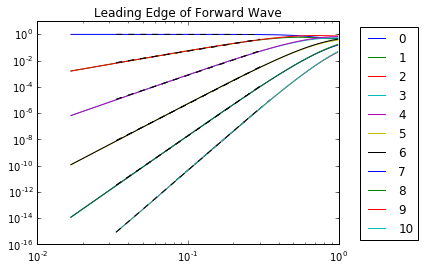

0 [ 9.9088299  -1.00930783]
1 [ 9.80392469 -1.1921265 ]
2 [ 7.88661177  0.38849071]
3 [ 7.88822927  0.3928292 ]
4 [ 5.87363142  1.35830824]
5 [ 5.87665983  1.36644734]
6 [ 3.85982199  1.75049778]
7 [ 3.8665327   1.76853724]
8 [ 1.85741308  1.36404258]
9 [ 1.87784882  1.41896213]
10 [-0.0110169  -0.02903279]


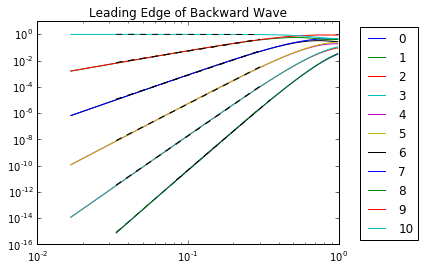

In [7]:
[front, back] = np.load("data/L11end1n60_here.npy")
L = 11
end = 1
ninit = 60
Ninit = ninit*end

ax = plt.subplot(111)
for i in range(L):
    ax.loglog(np.arange(Ninit)/ninit,front[i], label = str(i))
    x = np.arange(Ninit)[2:19]/ninit
    y = front[i][2:19]
    if (i == 9): 
        x = np.arange(Ninit)[5:22]/ninit
        y = front[i][5:22]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    ax.loglog(x,yfit(x), 'k--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Leading Edge of Forward Wave')
# plt.savefig('figures/L11end1n60_herefore.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    plt.loglog(np.arange(Ninit)/ninit,back[i], label = str(i))
    x = np.arange(Ninit)[2:19]/ninit
    y = back[i][2:19]
    if (i == 1): 
        x = np.arange(Ninit)[5:22]/ninit
        y = back[i][5:22]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    plt.loglog(x,yfit(x), 'k--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Leading Edge of Backward Wave')
# plt.savefig('figures/L11end1n60_hereback.pdf')
plt.show()

[(0.89411765336990356, 0.10196078568696976, 0.1098039224743836),
 (0.21602460800432688, 0.49487120380588578, 0.71987698697576341),
 (0.30426760128900115, 0.68329106055054012, 0.29293349969620797),
 (0.60083047361934894, 0.30814303335021531, 0.63169552298153153),
 (1.0, 0.50591311045721454, 0.0031372549487094226),
 (0.99315647868549106, 0.98700499826786559, 0.19915417450315831),
 (0.65845446095747096, 0.34122261685483596, 0.17079585352364723),
 (0.95850826852461857, 0.50846600392285535, 0.7449288887136124),
 (0.60000002384185791, 0.60000002384185791, 0.60000002384185791)]

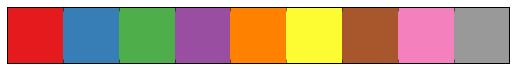

In [34]:
sns.choose_colorbrewer_palette('qualitative',as_cmap=False)